In [20]:
import os
os.chdir('/home/zongchen/nest_bq')
import numpy as np
import jax
import matplotlib.pyplot as plt

rng_key = jax.random.PRNGKey(0)

In [21]:
seed_numbers = np.arange(10, 20)
dim = 2
delta = 0.15
q = 2
reparam = 'uniform'
kernel = 'matern'
kq_rewards_all, kq_nmse_all, kq_cost_all = None, None, None
mc_rewards_all, mc_nmse_all, mc_cost_all = None, None, None
mlmc_rewards_all, mlmc_nmse_all, mlmc_cost_all = None, None, None
utility = 'lookahead_EI'
for seed in seed_numbers:
    kq_dir_path = f"/home/zongchen/nest_bq/results/bo/ackley/{utility}_kq__dim_{dim}__delta_{0.01}__q_{q}__kernel_{kernel}__reparam_{reparam}__seed_{seed}__complete/"

    if kq_rewards_all is None:
        kq_rewards_all = np.load(kq_dir_path + "rewards.npy")[:, None]
        kq_nmse_all = np.load(kq_dir_path + "nmse.npy")[:, None]
        kq_cost_all = np.load(kq_dir_path + "costs.npy")[:, None]
    else:
        kq_rewards = np.load(kq_dir_path + "rewards.npy")[:, None]
        kq_nmse = np.load(kq_dir_path + "nmse.npy")[:, None]
        kq_cost = np.load(kq_dir_path + "costs.npy")[:, None]
        kq_rewards_all = np.concatenate((kq_rewards_all, kq_rewards), axis=1)
        kq_nmse_all = np.concatenate((kq_nmse_all, kq_nmse), axis=1)
        kq_cost_all = np.concatenate((kq_cost_all, kq_cost), axis=1)
    
    mc_dir_path = f"/home/zongchen/nest_bq/results/bo/ackley/{utility}_mc__dim_{dim}__delta_{0.01}__q_{q}__kernel_matern__reparam_uniform__seed_{seed}__complete/"
    if mc_rewards_all is None:
        mc_rewards_all = np.load(mc_dir_path + "rewards.npy")[:, None]
        mc_nmse_all = np.load(mc_dir_path + "nmse.npy")[:, None]
        mc_cost_all = np.load(mc_dir_path + "costs.npy")[:, None]
    else:
        mc_rewards = np.load(mc_dir_path + "rewards.npy")[:, None]
        mc_nmse = np.load(mc_dir_path + "nmse.npy")[:, None]
        mc_cost = np.load(mc_dir_path + "costs.npy")[:, None]
        mc_rewards_all = np.concatenate((mc_rewards_all, mc_rewards), axis=1)
        mc_nmse_all = np.concatenate((mc_nmse_all, mc_nmse), axis=1)
        mc_cost_all = np.concatenate((mc_cost_all, mc_cost), axis=1)

    mlmc_dir_path = f"/home/zongchen/nest_bq/results/bo/ackley/{utility}_mlmc__dim_{dim}__delta_{0.1}__q_{q}__kernel_matern__reparam_uniform__seed_{seed}__complete/"
    if mlmc_rewards_all is None:
        mlmc_rewards_all = np.load(mlmc_dir_path + "rewards.npy")[:, None]
        mlmc_nmse_all = np.load(mlmc_dir_path + "nmse.npy")[:, None]
        mlmc_cost_all = np.load(mlmc_dir_path + "costs.npy")[:, None]
    else:
        mlmc_rewards = np.load(mlmc_dir_path + "rewards.npy")[:, None]
        mlmc_nmse = np.load(mlmc_dir_path + "nmse.npy")[:, None]
        mlmc_cost = np.load(mlmc_dir_path + "costs.npy")[:, None]
        mlmc_rewards_all = np.concatenate((mlmc_rewards_all, mlmc_rewards), axis=1)
        mlmc_nmse_all = np.concatenate((mlmc_nmse_all, mlmc_nmse), axis=1)
        mlmc_cost_all = np.concatenate((mlmc_cost_all, mlmc_cost), axis=1)

mc_rewards_median = np.median(mc_rewards_all, axis=1)
kq_rewards_median = np.median(kq_rewards_all, axis=1)
mlmc_rewards_median = np.median(mlmc_rewards_all, axis=1)
mc_rewards_q25 = np.quantile(mc_rewards_all, 0.25, axis=1)
mc_rewards_q75 = np.quantile(mc_rewards_all, 0.75, axis=1)
kq_rewards_q25 = np.quantile(kq_rewards_all, 0.25, axis=1)
kq_rewards_q75 = np.quantile(kq_rewards_all, 0.75, axis=1)
mlmc_rewards_q25 = np.quantile(mlmc_rewards_all, 0.25, axis=1)
mlmc_rewards_q75 = np.quantile(mlmc_rewards_all, 0.75, axis=1)

mc_nmse_median = np.median(mc_nmse_all, axis=1)
kq_nmse_median = np.median(kq_nmse_all, axis=1)
mlmc_nmse_median = np.median(mlmc_nmse_all, axis=1)
mc_nmse_q25 = np.quantile(mc_nmse_all, 0.25, axis=1)
mc_nmse_q75 = np.quantile(mc_nmse_all, 0.75, axis=1)
kq_nmse_q25 = np.quantile(kq_nmse_all, 0.25, axis=1)
kq_nmse_q75 = np.quantile(kq_nmse_all, 0.75, axis=1)
mlmc_nmse_q25 = np.quantile(mlmc_nmse_all, 0.25, axis=1)
mlmc_nmse_q75 = np.quantile(mlmc_nmse_all, 0.75, axis=1)


mc_cost_median = np.median(mc_cost_all, axis=1)
kq_cost_median = np.median(kq_cost_all, axis=1)
mlmc_cost_median = np.median(mlmc_cost_all, axis=1)

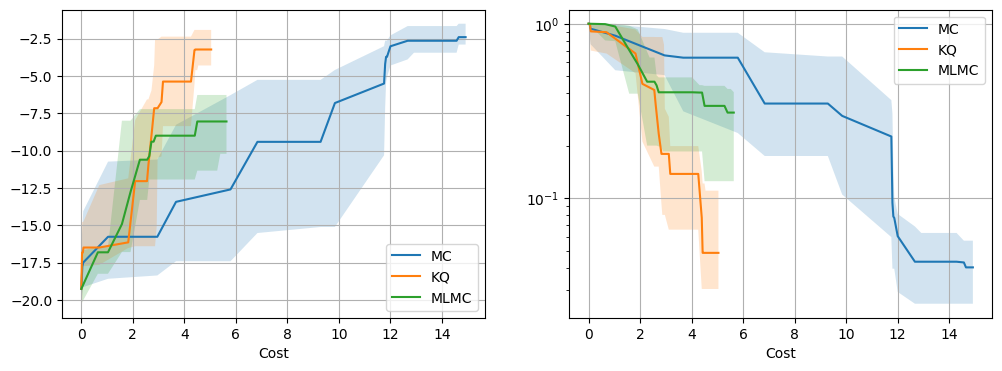

In [22]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].grid(True)
axs[0].plot(mc_cost_median, mc_rewards_median, label=f'MC')
axs[0].fill_between(mc_cost_median, mc_rewards_q25, mc_rewards_q75, alpha=0.2)
axs[0].plot(kq_cost_median, kq_rewards_median, label=f'KQ')
axs[0].fill_between(kq_cost_median, kq_rewards_q25, kq_rewards_q75, alpha=0.2)
axs[0].plot(mlmc_cost_median, mlmc_rewards_median, label=f'MLMC')
axs[0].fill_between(mlmc_cost_median, mlmc_rewards_q25, mlmc_rewards_q75, alpha=0.2)
axs[0].set_xlabel('Cost')
axs[0].legend()

axs[1].grid(True)
axs[1].plot(mc_cost_median, mc_nmse_median, label=f'MC')
axs[1].fill_between(mc_cost_median, mc_nmse_q25, mc_nmse_q75, alpha=0.2)
axs[1].plot(kq_cost_median, kq_nmse_median, label=f'KQ')
axs[1].fill_between(kq_cost_median, kq_nmse_q25, kq_nmse_q75, alpha=0.2)
axs[1].plot(mlmc_cost_median, mlmc_nmse_median, label=f'MLMC')
axs[1].fill_between(mlmc_cost_median, mlmc_nmse_q25, mlmc_nmse_q75, alpha=0.2)
axs[1].set_xlabel('Cost')
axs[1].legend()
axs[1].set_yscale('log')
plt.show()

In [23]:
kq_rewards_median

array([-19.26399631, -16.82963465, -16.82963465, -16.49320582,
       -16.49320582, -16.14670259, -12.04459848, -12.04459848,
       -10.95800028,  -8.99040027,  -7.15708128,  -7.15708128,
        -7.15708128,  -7.15708128,  -6.74383358,  -5.37170339,
        -5.37170339,  -5.37170339,  -5.37170339,  -3.25804321,
        -3.222191  ,  -3.222191  ,  -3.222191  ,  -3.222191  ,
        -3.222191  ,  -3.222191  ,  -3.222191  ,  -3.222191  ,
        -3.222191  ,  -3.222191  ,  -3.222191  ])

In [24]:
mc_rewards_median

array([-19.26399631, -17.77417367, -17.4990129 , -15.77251228,
       -15.77251228, -13.43197083, -12.59909936,  -9.41102931,
        -9.41102931,  -6.80996873,  -5.50348755,  -4.19235846,
        -3.71288887,  -3.71288887,  -3.00610758,  -2.63626191,
        -2.63626191,  -2.63626191,  -2.63626191,  -2.63626191,
        -2.63626191,  -2.63626191,  -2.63626191,  -2.63626191,
        -2.63626191,  -2.394709  ,  -2.394709  ,  -2.394709  ,
        -2.394709  ,  -2.394709  ,  -2.394709  ])